# Overview

In this notebook, we analyze the factors affecting a player's valuation and build a machine learning model to predict a player's value in the transfer market. This guides transfer decisions by identifying undervalued or overvalued players to buy and sell. 

# 1. Import packages and data

In [772]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [873]:
df2 = pd.read_csv('/Users/sivaguganjayachandran/Downloads/players_3120.csv')
df2

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,CAM,0,€4.1M,€45K,€0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,7,14,13,6,14,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,CAM,16,€1.8M,€3K,€4.5M,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,10,7,9,5,8,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,CAM,4,€43.5M,€145K,€92.4M,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,13,9,13,10,6,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,CAM,18,€1M,€900,€2.3M,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,9,13,7,11,8,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,CAM,11,€22M,€41K,€49.5M,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,13,10,11,14,10,1960,405,1,72,70,80,81,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,M. Wörl CDM CM,19,65,78,"DSC Arminia Bielefeld\nJun 30, 2024 On loan",270403,"178cm / 5'10""",69kg / 152lbs,Right,66,CDM,13,€1.6M,€3K,€0,254,58,45,50,67,34,263,59,41,41,59,63,310,66,63,64,62,55,288,50,59,76,59,44,285,59,63,53,60,50,57,193,65,66,62,62,13,11,13,11,14,1655,357,1,64,46,60,61,63,NaN
3116,F. Di Michele Sanchez LWB,20,62,72,Saarbrücken\n2023 ~ 2024,270461,"180cm / 5'11""",81kg / 179lbs,Left,62,LWB,10,€825K,€1K,€1.4M,241,60,30,54,58,39,255,61,47,38,53,56,341,74,76,64,61,66,273,38,69,62,68,36,256,64,58,44,45,45,55,172,57,58,57,54,8,13,13,13,7,1592,347,1,75,35,54,60,57,NaN
3117,Aceves GK,19,69+1,82+1,"Eldense\nJun 30, 2024 On loan",270529,"190cm / 6'3""",85kg / 187lbs,Right,69,GK,13,€2.9M,€2K,€0,70,15,10,10,24,11,80,9,16,15,25,15,196,20,31,38,57,50,220,52,58+1,27,71,12,105,27,15,8,41,14,37,47,20,14,13,348,70+1,68+1,69,69+1,72+1,1066,372,1,70,68,69,72,24,NaN
3118,T. Walczak ST,17,54,69,Raków Częstochowa\n2023 ~ 2026,270594,"189cm / 6'2""",88kg / 194lbs,Right,56,ST,15,€250K,€500,€506K,223,31,55,56,45,36,201,51,40,30,31,49,290,62,65,58,54,51,292,51,64,60,64,53,203,29,10,55,51,58,48,46,19,15,12,53,6,9,11,14,13,1308,283,1,64,53,40,51,19,NaN


# 2. Understand data

In [775]:
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,CAM,0,€4.1M,€45K,€0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,7,14,13,6,14,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,CAM,16,€1.8M,€3K,€4.5M,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,10,7,9,5,8,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,CAM,4,€43.5M,€145K,€92.4M,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,13,9,13,10,6,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,CAM,18,€1M,€900,€2.3M,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,9,13,7,11,8,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,CAM,11,€22M,€41K,€49.5M,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,13,10,11,14,10,1960,405,1,72,70,80,81,52,NaN


In [776]:
df.shape

(3120, 65)

In [777]:
df.describe()

,Age,ID,Best overall,Growth,Total attacking,Total skill,Total movement,Total power,Total mentality,Total defending,Total goalkeeping,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,0.0
mean,24.218590,236637.525321,74.368910,5.875962,291.675641,307.003846,349.397756,328.516026,293.083333,155.752564,72.398077,1797.827244,394.946474,1.450962,73.015385,61.509936,65.975321,71.527244,54.649359,NaN
std,4.876116,39161.333184,6.430639,5.714962,72.207131,75.263189,52.477820,50.544401,63.164889,64.891734,79.925173,258.036837,38.493322,0.804862,10.379235,14.111539,9.621618,8.620042,18.068982,NaN
min,16.000000,41.000000,49.000000,0.000000,51.000000,61.000000,133.000000,146.000000,72.000000,24.000000,13.000000,843.000000,253.000000,1.000000,29.000000,21.000000,31.000000,34.000000,16.000000,NaN
25%,20.000000,224285.000000,70.000000,0.000000,267.000000,280.000000,325.000000,299.000000,268.000000,97.000000,47.000000,1670.750000,369.000000,1.000000,67.000000,53.000000,60.000000,66.750000,38.000000,NaN
50%,23.000000,243017.000000,75.000000,5.000000,304.000000,321.000000,359.000000,335.000000,303.000000,174.000000,52.000000,1839.000000,398.000000,1.000000,74.000000,64.000000,67.000000,72.000000,58.000000,NaN
75%,27.000000,262621.000000,79.000000,10.000000,339.000000,357.000000,385.000000,366.000000,334.000000,212.000000,57.000000,1973.250000,422.000000,2.000000,80.000000,72.000000,73.000000,77.000000,70.000000,NaN
max,44.000000,279922.000000,93.000000,25.000000,440.000000,465.000000,462.000000,442.000000,417.000000,269.000000,433.000000,2330.000000,500.000000,5.000000,97.000000,93.000000,94.000000,94.000000,89.000000,NaN


In [778]:
# no missing values
df.isnull().sum().sum()

3120

# 3. Data cleaning and feature engineering

In [780]:
# drop empty column
df.drop(columns='Unnamed: 64', inplace=True)

In [781]:
# standardize column names
df.columns = df.columns.str.lower().str.replace(' / ','_').str.replace(' ','_')
df.columns

Index(['name', 'age', 'overall_rating', 'potential', 'team_&_contract', 'id',
       'height', 'weight', 'foot', 'best_overall', 'best_position', 'growth',
       'value', 'wage', 'release_clause', 'total_attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'total_skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing',
       'ball_control', 'total_movement', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'total_power', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'total_mentality',
       'aggression', 'interceptions', 'att._position', 'vision', 'penalties',
       'composure', 'total_defending', 'defensive_awareness',
       'standing_tackle', 'sliding_tackle', 'total_goalkeeping', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'total_stats', 'base_stats', 'international_reputation', 'pace_diving',
       'shooting_handling', 'passing_kicking

In [782]:
# split name column into name & position column, and remove all numbers

import re

# list of soccer positions
positions = ['GK', 'LB', 'LWB', 'RB', 'RWB', 'CB', 'CAM', 'CM', 'CDM', 'LW', 'RW' ,'LM', 'RM', 'LF', 'RF', 'CF', 'ST']

def split_name_position(row):
    row = re.sub(r'\d+', '', row) # remove all numbers
    parts = row.split() # split row into parts
    name_chunk = [part for part in parts if part not in positions] # identify names
    position_chunk = [part for part in parts if part in positions] # identify positions
    
    # stitch names and positions
    name = ' '.join(name_chunk)
    position = ', '.join(position_chunk)
    return pd.Series([name, position])

df[['player_name', 'position']] = df['name'].apply(split_name_position)
df.drop('name', axis=1, inplace=True)

<Axes: xlabel='no_of_playable_positions', ylabel='Count'>

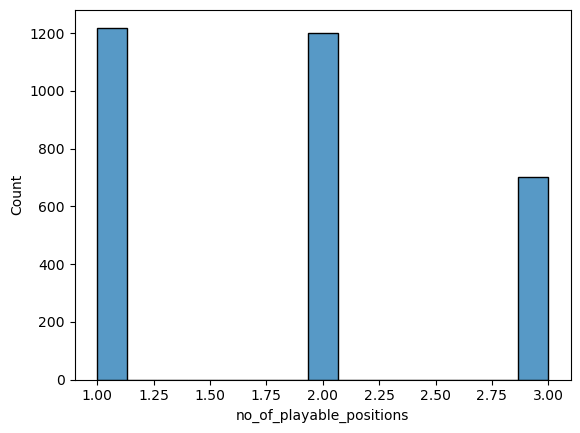

In [783]:
# get no of playable positions for each player
df['no_of_playable_positions'] = df.position.apply(lambda x: len(x.split(','))).astype(int)
sns.histplot(df['no_of_playable_positions'])

In [784]:
# split team_&_contract column to team & contract['start'] & contract['end'] column
df[['team', 'contract']] = df['team_&_contract'].str.split('\n', expand=True)

# extract start and end dates
df['contract_start'] = df['contract'].str.split(' ~ ').str[0]
df['contract_end'] = df['contract'].str.split(' ~ ').str[-1]

# convert 'contract_end' to last 4 characters if they are not dates
df['contract_end'] = df['contract_end'].apply(lambda x: x if x.isdigit() else x[-4:])
df.drop(['team_&_contract', 'contract'], axis=1, inplace=True)

df.head()

,age,overall_rating,potential,id,height,weight,foot,best_overall,best_position,growth,value,wage,release_clause,total_attacking,crossing,finishing,heading_accuracy,short_passing,volleys,total_skill,dribbling,curve,fk_accuracy,long_passing,ball_control,total_movement,acceleration,sprint_speed,agility,reactions,balance,total_power,shot_power,jumping,stamina,strength,long_shots,total_mentality,aggression,interceptions,att._position,vision,penalties,composure,total_defending,defensive_awareness,standing_tackle,sliding_tackle,total_goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,player_name,position,no_of_playable_positions,team,contract_start,contract_end
0,34,78,78,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,CAM,0,€4.1M,€45K,€0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,7,14,13,6,14,1875,377,3,49,72,83,84,28,Ronaldinho,"CAM, ST",2,Querétaro,2014,2016
1,19,65,81,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,CAM,16,€1.8M,€3K,€4.5M,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,10,7,9,5,8,1651,351,1,72,54,61,70,44,O. Hutchinson,"RM, CAM",2,Ipswich Town,2022,2025
2,23,82,86,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,CAM,4,€43.5M,€145K,€92.4M,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,13,9,13,10,6,1897,409,1,85,74,78,85,31,Brahim,CAM,1,Real Madrid,2019,2027
3,17,62,80,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,CAM,18,€1M,€900,€2.3M,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,9,13,7,11,8,1644,353,1,72,50,59,66,52,K. Wätjen,CM,1,Borussia Dortmund,2024,2028
4,18,77,88,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,CAM,11,€22M,€41K,€49.5M,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,13,10,11,14,10,1960,405,1,72,70,80,81,52,A. Güler,"CAM, RM",2,Real Madrid,2023,2029


In [785]:
# replace errant values (e.g. 'loan') with blanks
pattern = r'^\d{4}$'

df['contract_start'] = df['contract_start'].apply(lambda x: re.match(pattern, str(x)).group() if re.match(pattern, str(x)) else '')
df['contract_end'] = df['contract_end'].apply(lambda x: re.match(pattern, str(x)).group() if re.match(pattern, str(x)) else '')

df['contract_start'] = pd.to_numeric(df['contract_start'], errors='coerce').fillna(0).astype(int)
df['contract_end'] = pd.to_numeric(df['contract_end'], errors='coerce').fillna(0).astype(int)

df.contract_start.unique(), df.contract_end.unique()

(array([2014, 2022, 2019, 2024, 2023, 2021, 2020, 2012,    0, 2018, 2016,
        2015, 2017, 2010, 2011, 2013, 2008, 1993, 1998, 2009, 1999, 2007]),
 array([2016, 2025, 2027, 2028, 2029, 2026, 2024, 2030,    0, 2031, 2032,
        2023, 2017, 2020, 2021, 2018, 2014, 2022, 2013, 2009, 2010, 2019,
        2015, 2012]))

In [786]:
df.contract_end.unique()

array([2016, 2025, 2027, 2028, 2029, 2026, 2024, 2030,    0, 2031, 2032,
       2023, 2017, 2020, 2021, 2018, 2014, 2022, 2013, 2009, 2010, 2019,
       2015, 2012])

<Axes: xlabel='contract_end', ylabel='Count'>

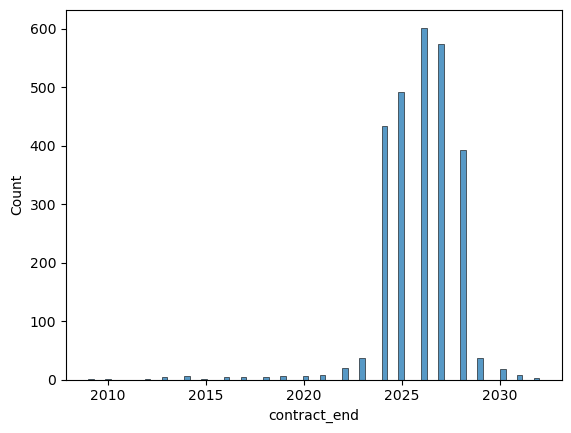

In [787]:
sns.histplot(df[df['contract_end']>0]['contract_end'])

In [788]:
# remove € from value, wage, release_clause columns

# check units
print(df.value.str[-1].unique())
print(df.wage.str[-1].unique())
print(df.release_clause.str[-1].unique())

def convert_value(value):
    if 'K' in value:
        return float(value.replace('€', '').replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('€', '').replace('M', '')) * 1000000
    else:
        return float(value.replace('€', ''))

# remove '€' and convert K and M in 'value', 'wage', and 'release_clause' columns
df['value'] = df['value'].apply(convert_value)
df['wage'] = df['wage'].apply(convert_value)
df['release_clause'] = df['release_clause'].apply(convert_value)

df.head()

['M' '0' 'K']
['K' '0']
['0' 'M' 'K']


,age,overall_rating,potential,id,height,weight,foot,best_overall,best_position,growth,value,wage,release_clause,total_attacking,crossing,finishing,heading_accuracy,short_passing,volleys,total_skill,dribbling,curve,fk_accuracy,long_passing,ball_control,total_movement,acceleration,sprint_speed,agility,reactions,balance,total_power,shot_power,jumping,stamina,strength,long_shots,total_mentality,aggression,interceptions,att._position,vision,penalties,composure,total_defending,defensive_awareness,standing_tackle,sliding_tackle,total_goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,player_name,position,no_of_playable_positions,team,contract_start,contract_end
0,34,78,78,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,CAM,0,4100000.0,45000.0,0.0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,7,14,13,6,14,1875,377,3,49,72,83,84,28,Ronaldinho,"CAM, ST",2,Querétaro,2014,2016
1,19,65,81,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,CAM,16,1800000.0,3000.0,4500000.0,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,10,7,9,5,8,1651,351,1,72,54,61,70,44,O. Hutchinson,"RM, CAM",2,Ipswich Town,2022,2025
2,23,82,86,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,CAM,4,43500000.0,145000.0,92400000.0,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,13,9,13,10,6,1897,409,1,85,74,78,85,31,Brahim,CAM,1,Real Madrid,2019,2027
3,17,62,80,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,CAM,18,1000000.0,900.0,2300000.0,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,9,13,7,11,8,1644,353,1,72,50,59,66,52,K. Wätjen,CM,1,Borussia Dortmund,2024,2028
4,18,77,88,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,CAM,11,22000000.0,41000.0,49500000.0,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,13,10,11,14,10,1960,405,1,72,70,80,81,52,A. Güler,"CAM, RM",2,Real Madrid,2023,2029


Text(0.5, 0, 'Player value')

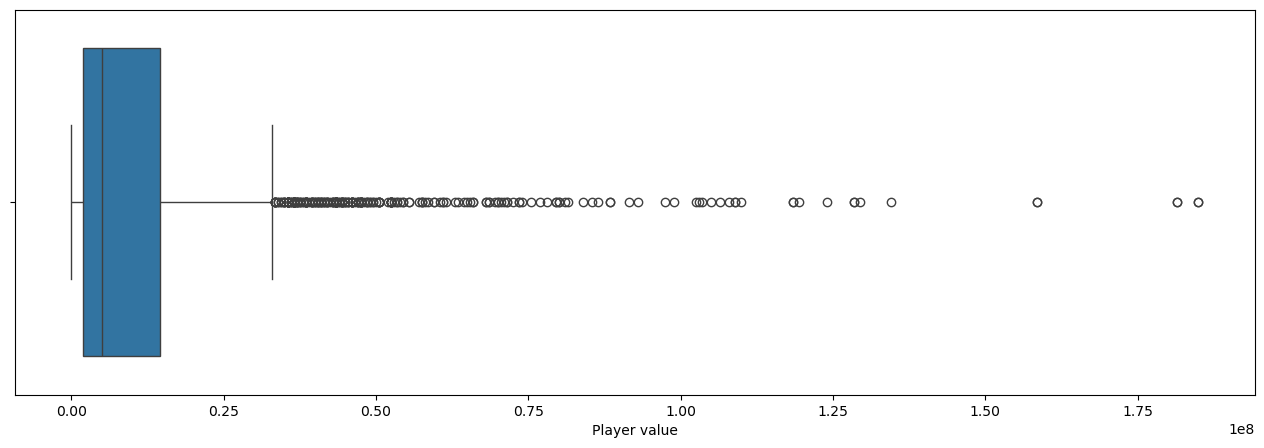

In [789]:
plt.figure(figsize=(16,5))
sns.boxplot(x=df.value)
plt.xlabel('Player value')

In [790]:
# clean height and weight columns
df['height'] = df['height'].str.extract(r'(\d+)')
df['weight'] = df['weight'].str.extract(r'(\d+)')

df[['height', 'weight']].head()

,height,weight
0,182,76
1,174,65
2,170,68
3,178,72
4,175,70


# 4. Exploratory data analysis

Exploring correlation between player value and features

<Axes: >

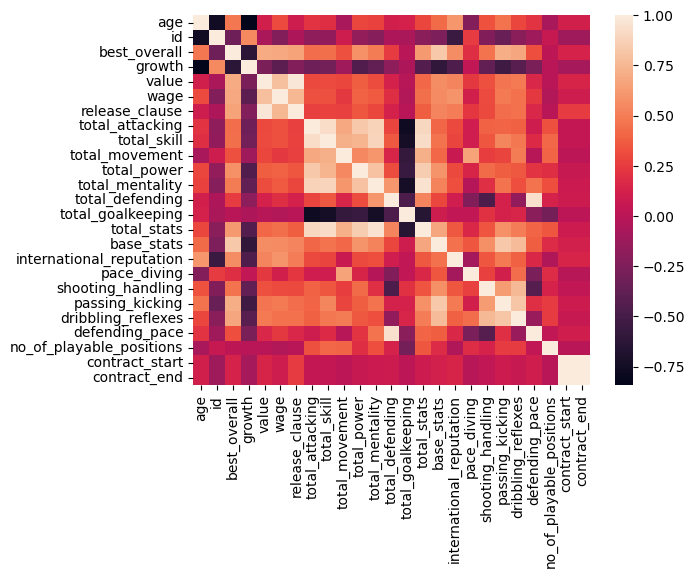

In [793]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=False)

<Axes: >

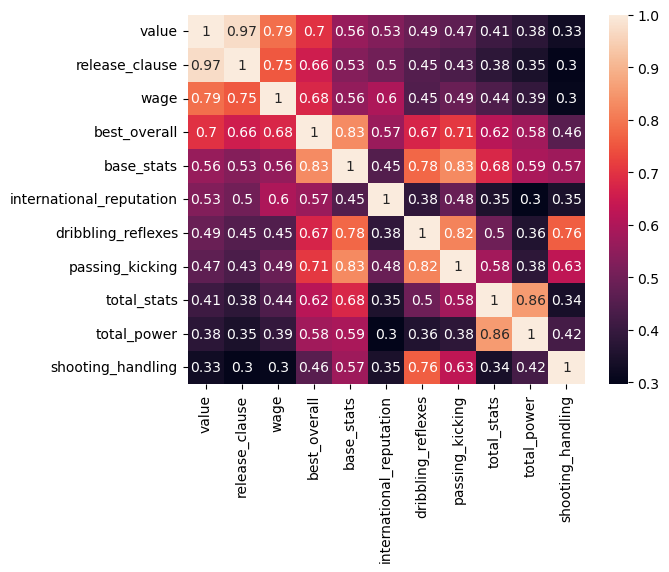

In [794]:
# get top 10 correlated variables with respect to 'value' column
top_correlations = df.select_dtypes(include='number').corr().abs().sort_values(by='value', ascending=False)[1:11]
top_correlated_variables = ['value']
top_correlated_variables.extend(list(top_correlations.index))

sns.heatmap(df[top_correlated_variables].corr(), annot=True)

The value of a soccer player depends a lot on their skills like dribbling, passing, and overall performance, as well as how well-known they are internationally. Understanding these factors helps clubs decide how much a player is worth. It's interesting to note that dribbling and reflexes are highly correlated to value, goes to show how valued these attributes are.

In [796]:
# group each player's (best) position as goalkeeper, defender, midfielder, and forward
print(df.best_position.unique(), '\n')

position_mapping = {
    'GK': 'Goalkeeper',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'RWB': 'Defender',
    'LWB': 'Defender',
    'CDM': 'Midfielder',
    'CM': 'Midfielder',
    'CAM': 'Midfielder',
    'LM': 'Midfielder',
    'RM': 'Midfielder',
    'RW': 'Forward',
    'LW': 'Forward',
    'CF': 'Forward',
    'ST': 'Forward'
}

df['core_position'] = df['best_position'].map(position_mapping)
df.core_position.value_counts()

['CAM' 'ST' 'LWB' 'CB' 'CM' 'RM' 'CDM' 'LM' 'RB' 'RWB' 'LB' 'LW' 'GK' 'CF'
 'RW'] 



core_position
Midfielder    1411
Defender       889
Forward        604
Goalkeeper     216
Name: count, dtype: int64

Exploring the relationship between height and value for defenders (CB, LB, RB, RWB, LWB)

<Axes: xlabel='height', ylabel='value'>

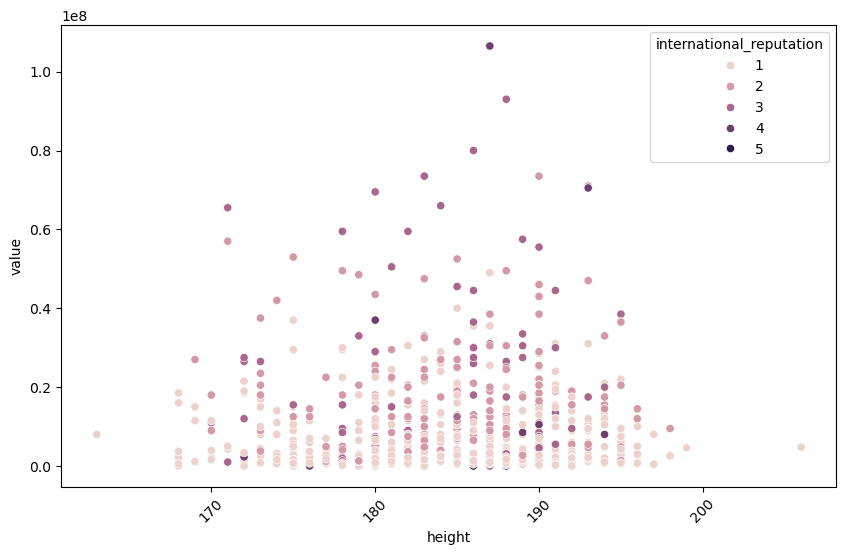

In [798]:
df.height = df.height.astype(int)
df_defenders = df.loc[df['core_position'] == 'Defender']

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

sns.scatterplot(data=df_defenders, x='height', y='value', hue='international_reputation')

Exploring best_overall and value

<Axes: xlabel='best_overall', ylabel='value'>

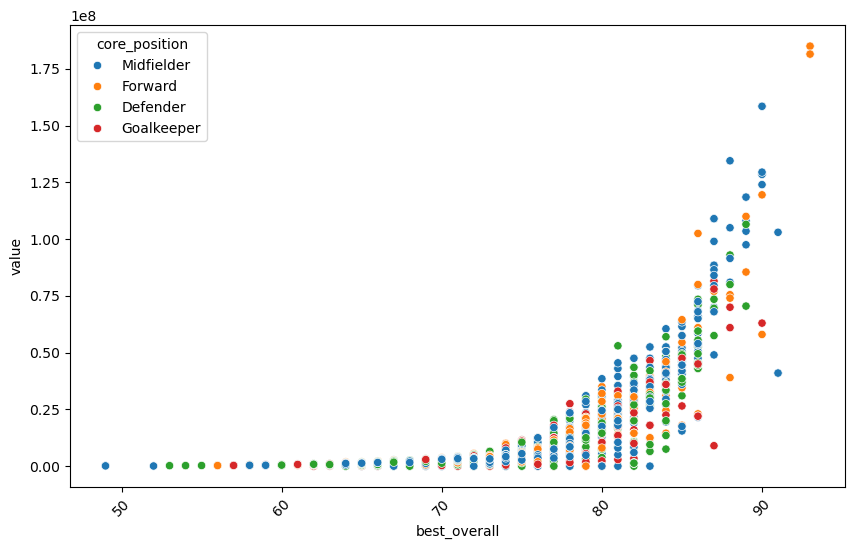

In [800]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

sns.scatterplot(data=df, x='best_overall', y='value', hue='core_position')

<Axes: xlabel='value', ylabel='core_position'>

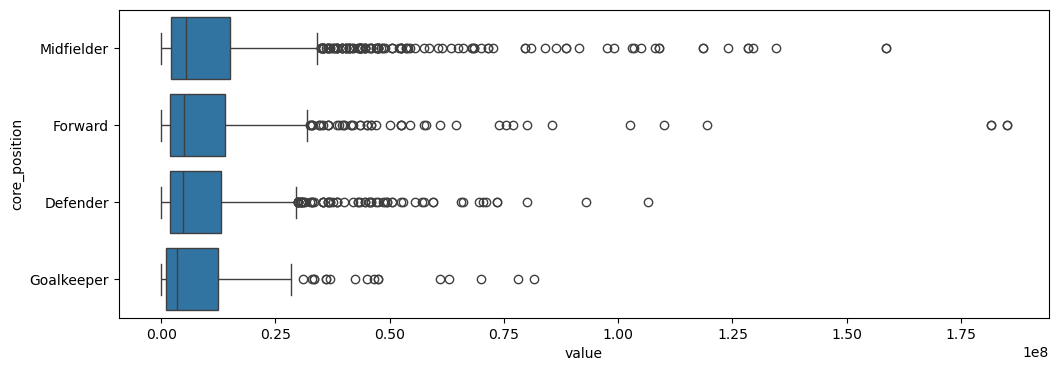

In [801]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, y='core_position', x='value')

Analyzing midfielders

In [803]:
# create age range brackets
age_bins = [10, 20, 30, 40]
age_labels = ['10-19', '20-29', '30-39']

df['age_brackets'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
df[['age', 'age_brackets']].head()

,age,age_brackets
0,34,30-39
1,19,10-19
2,23,20-29
3,17,10-19
4,18,10-19


In [804]:
df.potential = df.potential.str[:2].astype(int)
df.potential.unique()

array([78, 81, 86, 80, 88, 75, 87, 92, 82, 90, 89, 94, 85, 84, 77, 83, 91,
       93, 73, 74, 76, 72, 79, 69, 71, 70, 64, 68, 65, 67, 66, 61, 62, 63,
       57, 54])

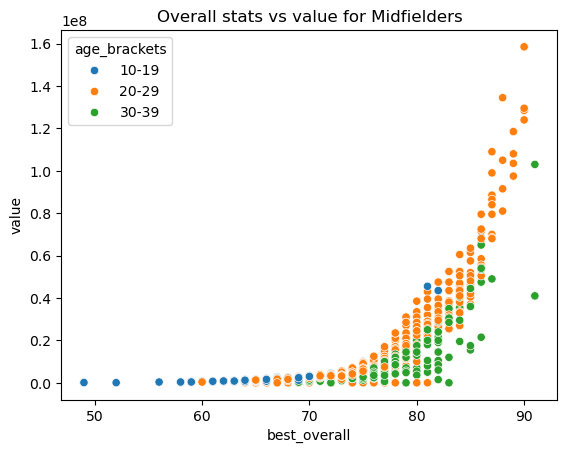

In [805]:
df_midfielders = df.loc[df['core_position'] == 'Midfielder']

sns.scatterplot(data=df_midfielders, x='best_overall', y='value', hue='age_brackets')
plt.title('Overall stats vs value for Midfielders')
plt.show()

<Axes: xlabel='potential', ylabel='value'>

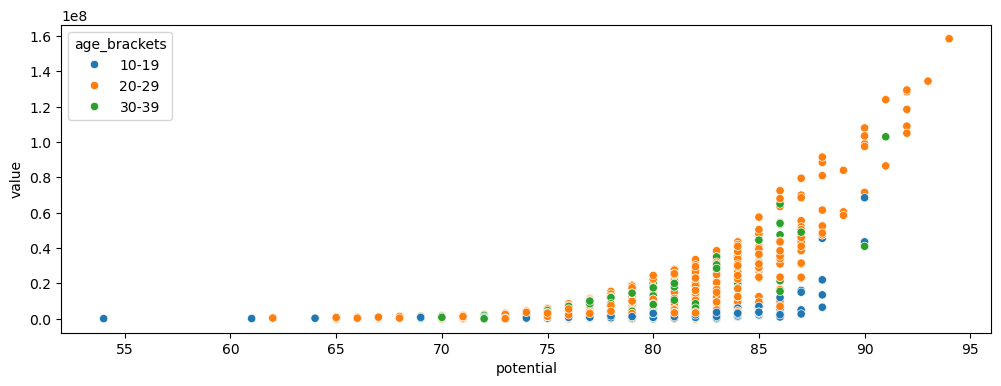

In [806]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df_midfielders, x='potential', y='value', hue='age_brackets')

In [842]:


df = df.drop_duplicates()

def clean_numeric(value):
    try:
        return int(value.split('-')[0].split('+')[0])  # Extract and convert to int
    except ValueError:
        return value 

numeric_columns = [
    'age', 'overall_rating', 'potential', 'total_attacking', 'crossing', 
    'finishing', 'heading_accuracy', 'short_passing', 'volleys', 
    'total_skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 
    'ball_control', 'total_movement', 'acceleration', 'sprint_speed', 
    'agility', 'reactions', 'balance', 'total_power', 'shot_power', 
    'jumping', 'stamina', 'strength', 'long_shots', 'total_mentality', 
    'aggression', 'interceptions', 'att_position', 'vision', 'penalties', 
    'composure', 'total_defending', 'defensive_awareness', 
    'standing_tackle', 'sliding_tackle', 'total_goalkeeping', 
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 
    'gk_reflexes', 'total_stats', 'base_stats', 'international_reputation', 
    'pace_diving', 'shooting_handling', 'passing_kicking', 
    'dribbling_reflexes', 'defending_pace'
]
def clean_numeric(value):
    # Convert to string
    str_value = str(value)
    
    # Remove unwanted characters and extract the main numeric part
    try:
        # Extract only the first two digits before any '+' or '-' or after
        filtered_value = ''.join(filter(str.isdigit, str_value))  # Keep only digits
        return int(filtered_value[:2])  # Return the first two digits as an integer
    except ValueError:
        return value  # Return original value if conversion fails

for col in numeric_columns:
    if col in df.columns:
        df[col] = df[col].apply(clean_numeric)

df = df.sort_values(by='overall_rating', ascending=False)
df.rename(columns={'passing_kicking': 'passing'}, inplace=True)
#df.rename(columns={'dribbling_reflexes': 'dribbling'}, inplace=True)




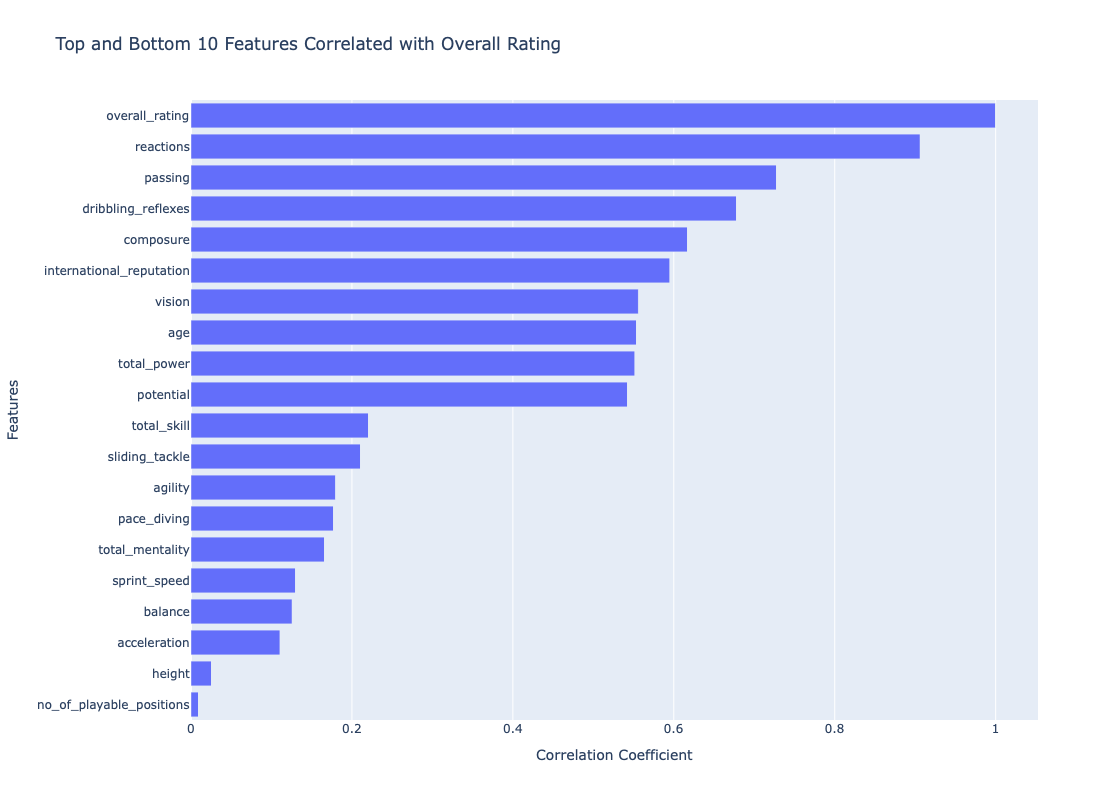

In [852]:
import plotly.express as px


numeric_columns = df.describe().columns.to_list()

gk_columns = [x for x in numerdf = pd.read_csv('/Users/sivaguganjayachandran/Documents/python programming/soccer/cleaned_df.csv')
ic_columns if 'gk' in x]
output_variables = ['growth', 'id','total_stats','total_defending','wage', 'value', 'release_clause','best_overall','base_stats','total_goalkeeping','contract_start','contract_end']
output_variables = output_variables + gk_columns
numeric_columns = [col for col in numeric_columns if col not in output_variables]

# Create a DataFrame for plotting
correlation_df = pd.DataFrame(correlation).reset_index()
correlation_df.columns = ['Feature', 'Correlation Coefficient']

# Filter top 10 and bottom 10 features
top_10 = correlation_df.tail(10)
bottom_10 = correlation_df.head(10)

# Combine top and bottom into one DataFrame
combined_df = pd.concat([bottom_10,top_10])

# Plotting with Plotly
fig = px.bar(
    combined_df, 
    x='Correlation Coefficient', 
    y='Feature', 
    orientation='h', 
    title='Top and Bottom 10 Features Correlated with Overall Rating',
    labels={'Correlation Coefficient': 'Correlation Coefficient', 'Feature': 'Features'},
    height=800  # Adjust height as needed
)

# Show the plot
fig.show()

In [840]:
df

#df.to_csv('/Users/sivaguganjayachandran/Documents/python programming/soccer/cleaned_df.csv')

# 5. Predicting Player  Value and pick out undervalued superstars to guide transfer decisions

Factors affecting a player's value differ across positions. Strikers are prized for their offensive abilities while defenders are prized for their defensive abilities. We will build a predictive model for each core position (goalkeeper, defender, midfielder, and forward).



In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler

In [126]:
features = ['best_overall', 'age', 'growth', 'total_attacking', 'total_skill', 'international_reputation', 'dribbling_reflexes', 'passing_kicking']
label = 'value'

In [127]:
# scale features
scaler = StandardScaler()

X = df_midfielders[features]
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=features)

y = df_midfielders[label]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

### Linear Regression

In [130]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"RMSE: {rmse_lr}")

RMSE: 9986093.810838005


### Random Forest Regressor

In [132]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"RMSE: {rmse_rf}")

RMSE: 4114496.850923968


We'll use the Random Forest Regressor due to lower RMSE.

#### Tune hyperparameters

In [135]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Best Estimator: RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)


In [136]:
feature_importances = best_estimator.feature_importances_
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

feature_importance_dict

{'best_overall': 0.900341226788571,
 'age': 0.04092076146082848,
 'growth': 0.02181022450829882,
 'total_attacking': 0.005679158463858863,
 'total_skill': 0.01056559561493789,
 'international_reputation': 0.0033515056089004716,
 'dribbling_reflexes': 0.010051330352705456,
 'passing_kicking': 0.007280197201898865}

In [137]:
y_pred_best = best_estimator.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f'RMSE of best model: {rmse_best}')

RMSE of best model: 4278815.098060224


### Identify players who are undervalued (to buy)

In [139]:
y_pred_best[:10]

array([16467816.8885008 ,  7599268.49322926, 16955075.21591532,
        2774906.21202866,  5227656.32643525,   850158.590418  ,
        2621286.93445709,  1614915.18644614, 10819642.17148918,
        1211257.46380044])

In [140]:
data_for_prediction = df.loc[X_test.index]
data_for_prediction.head()

,age,overall_rating,potential,id,height,weight,foot,best_overall,best_position,growth,value,wage,release_clause,total_attacking,crossing,finishing,heading_accuracy,short_passing,volleys,total_skill,dribbling,curve,fk_accuracy,long_passing,ball_control,total_movement,acceleration,sprint_speed,agility,reactions,balance,total_power,shot_power,jumping,stamina,strength,long_shots,total_mentality,aggression,interceptions,att._position,vision,penalties,composure,total_defending,defensive_awareness,standing_tackle,sliding_tackle,total_goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,player_name,position,no_of_playable_positions,team,contract_start,contract_end,core_position,age_brackets
292,22,78-1,84,248695,190,84,Right,80,CB,6,20500000.0,73000.0,43100000.0,265,42+3,39+10,73,72,39-1,287,63,46+7,44+6,67,67,329,63,78,60,73,55-2,309,50+2,80,60-2,80,39+2,300,80-1,80-2,39-3,55+8,46-2,72,241,80,81-1,80,55,14,12,9,14,6,1786,391,1,71,42,59,64,80,W. Fofana,CB,1,Chelsea,2022,2029,Defender,20-29
568,25,77,80,243388,186,79,Left,78,LWB,3,13000000.0,15000.0,19200000.0,312,87,41,64,76,44,379,76,84,68,72,79,366,72,76,72,77,69,357,70,74,79,69,65,313,65,71,69,77,31,76,213,67,71,75,39,10,6,6,8,9,1979,422,2,74,53,78,76,70,B. Sosa,LB,1,Ajax,2023,2028,Defender,20-29
428,26,81,82,227813,175,64,Left,83,CM,1,27500000.0,105000.0,52900000.0,359,84,58,70,86,61,412,84,83,76,84,85,372,73,61,79,81,78,365,78,74,77,63,73,372,74,80,77,83,58,81,236,77,80,79,61,15,11,13,11,11,2177,446,2,66,66,84,83,78,O. Zinchenko,LB,1,Arsenal,2022,2027,Midfielder,20-29
1174,25,79,80,227174,185,74,Right,79,RB,1,19000000.0,73000.0,37500000.0,321,77,66,49,74,55,340,75,70,48,71,76,385,78,80,78,79,70,364,77,69,86,68,64,341,84,76,71,66,44,72,237,77,80,80,65,15,16,13,13,8,2053,442,2,79,66,71,75,75,M. Cash,"RB, RWB, RM",3,Aston Villa,2020,2027,Defender,20-29
1123,21,72,82,257896,183,80,Right,72,RB,10,5000000.0,18000.0,10500000.0,273,63,41,62,66,41,313,70,56,57,61,69,364,74,79,72,67,72,319,62,74,74,68,41,284,74,66,55,54,35,58,215,70,73,72,44,7,13,9,7,8,1812,394,1,77,46,61,69,70,N. Patterson,"RB, RWB",2,Everton,2022,2027,Defender,20-29


In [141]:
data_for_prediction['predicted_value'] = y_pred_best.astype(int)
data_for_prediction['gap'] = data_for_prediction['predicted_value'] - data_for_prediction['value']
data_for_prediction[['player_name', 'best_overall', 'potential', 'value', 'predicted_value', 'gap']]

,player_name,best_overall,potential,value,predicted_value,gap
292,W. Fofana,80,84,20500000.0,16467816,-4032184.0
568,B. Sosa,78,80,13000000.0,7599268,-5400732.0
428,O. Zinchenko,83,82,27500000.0,16955075,-10544925.0
1174,M. Cash,79,80,19000000.0,2774906,-16225094.0
1123,N. Patterson,72,82,5000000.0,5227656,227656.0
...,...,...,...,...,...,...
168,G. Restes,75,87,11500000.0,95213095,83713095.0
800,Pablo Maffeo,79,82,21500000.0,11816874,-9683126.0
1134,Lee Han Beom,72,81,3300000.0,2936642,-363358.0
966,L. Kelly,76,77,5000000.0,1498218,-3501782.0


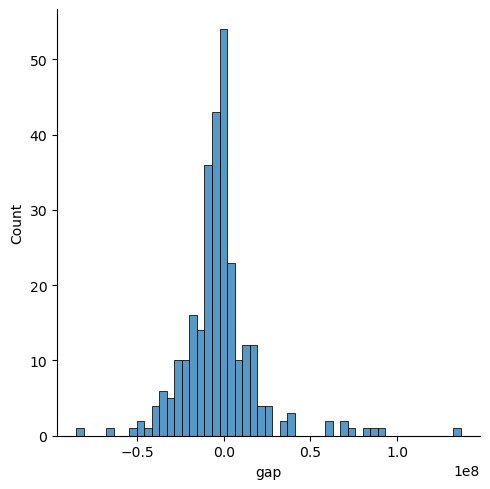

In [142]:
sns.displot(data_for_prediction.gap)

Identify players with gap > 1,000,000 (highly undervalued)

In [144]:
# top undervalued players to buy
under_valued_midfielders = data_for_prediction.loc[data_for_prediction['gap'] >= 1e7]
under_valued_midfielders[['player_name', 'best_overall', 'potential', 'age', 'gap']].sort_values(by='gap', ascending=False).head(30)

,player_name,best_overall,potential,age,gap
51,R. Bardghji,71,85,17,136755000.0
148,S. Szmodics,75,75,27,91044761.0
358,M. Soulé,76,86,20,87313095.0
168,G. Restes,75,87,18,83713095.0
75,W. Zaïre-Emery,82,90,17,73765000.0
100,Palhinha,86,85,27,69673333.0
201,A. Vermeeren,78,87,18,68478777.0
112,R. Bardghji,71,85,17,62648888.0
57,Pau Cubarsí,66,83,16,61813333.0
214,L. Miley,72,85,17,40227470.0


In [353]:
#df.to_csv('/Users/sivaguganjayachandran/Documents/python programming/soccer/cleaned_df.csv')

In [560]:
df

,age,overall_rating,potential,id,height,weight,foot,best_overall,best_position,growth,value,wage,release_clause,total_attacking,crossing,finishing,heading_accuracy,short_passing,volleys,total_skill,dribbling,curve,fk_accuracy,long_passing,ball_control,total_movement,acceleration,sprint_speed,agility,reactions,balance,total_power,shot_power,jumping,stamina,strength,long_shots,total_mentality,aggression,interceptions,att._position,vision,penalties,composure,total_defending,defensive_awareness,standing_tackle,sliding_tackle,total_goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,player_name,position,no_of_playable_positions,team,contract_start,contract_end,core_position,age_brackets
228,32,91,91,192985,181,75,Right,91,CM,0,103000000.0,350000.0,190600000.0,412,95,85,55,94,83,447,86,92,83,94,92,394,74,74,76,92,78,420,92,73,88,75,92,407,75,66,88,95,83,88,189,66,70,53,56,15,13,5,10,13,2325,486,5,74,88,94,87,65,K. De Bruyne,"CM, CAM",2,Manchester City,2015,2025,Midfielder,30-39
49,22,91,94,239085,195,94,Left,93,ST,3,185000000.0,340000.0,356100000.0,393,47,96,83,77,90,363,79,77,62,63,82,420,82,94,78,94,72,442,94,93,76,93,86,386,87,43,96,74,86,87,114,38,47,29,52,7,14,13,11,7,2170,464,5,89,93,68,81,45,E. Haaland,ST,1,Manchester City,2022,2027,Forward,20-29
53,24,91,94,231747,182,75,Right,93,ST,3,181500000.0,230000.0,349400000.0,415,78,94,73,86,84,405,93,80,69,71,92,462,97,97,93,93,82,426,90,88,88,77,83,362,64,38,93,83,84,88,92,26,34,32,42,13,5,7,11,6,2204,473,5,97,90,80,92,36,K. Mbappé,"ST, LW",2,Paris Saint Germain,2018,2024,Forward,20-29
215,31,90,90,192119,200,96,Left,90,GK,0,63000000.0,250000.0,129200000.0,86,14,14,13,33,12,110,13,19,20,35,23,290,42,52,63,88,45,250,57,68,38,70,17,122,23,15,13,44,27,66,54,20,18,16,433,85,89,76,90,93,1345,479,5,85,89,76,93,46,T. Courtois,GK,1,Real Madrid,2018,2026,Goalkeeper,30-39
141,29,90,90,202126,188,85,Right,90,ST,0,119500000.0,170000.0,197200000.0,440,80,95,89,87,89,404,82,82,65,88,87,369,67,70,66,93,73,433,93,87,81,85,87,395,80,42,94,87,92,92,130,46,46,38,54,8,10,11,14,11,2225,461,5,69,93,84,83,49,H. Kane,ST,1,FC Bayern München,2023,2027,Forward,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,19,53,66,276242,178,71,Left,53,LB,13,210000.0,1000.0,499000.0,190,48,22,46,49,25,190,52,26,28,44,40,304,66,69,57,47,65,221,20,54,62,59,26,203,48,49,42,32,32,40,148,48,51,49,43,7,12,11,8,5,1299,289,1,68,24,42,49,49,J. Hallard,LB,1,AFC Wimbledon,2022,2024,Defender,10-19
3101,17,52,75,269756,191,81,Left,54,CB,23,240000.0,500.0,540000.0,175,28,19,50,52,26,177,41,28,24,42,42,232,54,54,40,48,36,221,44,56,36,65,20,204,48,50,34,32,40,47,154,52,54,48,54,7,13,10,12,12,1217,267,1,54,26,39,42,52,I. Aalberg,CB,1,Kristiansund,2021,2024,Defender,10-19
2910,17,52,68,277612,190,82,Right,54,ST,16,200000.0,600.0,495000.0,229,40,52,49,40,48,193,45,38,31,31,48,298,62,68,63,51,54,283,56,58,57,65,47,233,68,25,53,36,51,47,77,24,30,23,50,7,14,10,7,12,1363,294,1,65,52,37,49,28,J. Ayres,ST,1,Rotherham United,2023,2026,Forward,10-19
3060,19,50,54,267820,175,67,Right,52,CAM,4,60000.0,500.0,98000.0,227,43,41,44,55,44,230,44,41,45,55,45,293,61,61,57,48,66,260,46,56,63,51,44,235,49,40,50,51,45,51,132,40,45,47,47,9,7,12,13,6,1424,299,1,61,43,51,47,43,M. Scott,"CM, CAM",2,UCD,2020,2023,Midfielder,10-19


In [625]:
#df['long_shots'].value_counts()

df.describe()

,age,overall_rating,potential,id,height,best_overall,growth,value,wage,release_clause,total_attacking,crossing,finishing,heading_accuracy,short_passing,volleys,total_skill,dribbling,curve,fk_accuracy,long_passing,ball_control,total_movement,acceleration,sprint_speed,agility,reactions,balance,total_power,shot_power,jumping,stamina,strength,long_shots,total_mentality,aggression,interceptions,vision,penalties,composure,total_defending,defensive_awareness,standing_tackle,sliding_tackle,total_goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,no_of_playable_positions,contract_start,contract_end
count,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2.749000e+03,2749.000000,2.749000e+03,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000
mean,24.184794,73.114951,79.024736,237151.447435,181.871590,74.271371,5.909785,1.112710e+07,29842.269916,1.978314e+07,32.682430,58.278647,55.717716,57.762459,68.564933,51.374318,32.734813,66.820662,58.064023,50.328119,62.553656,69.051291,34.463077,70.535104,70.721717,69.620589,70.071662,68.146599,32.411059,66.184067,71.193525,67.734449,67.280102,56.182612,30.382321,62.257184,52.097854,64.025464,54.492907,67.339032,31.203347,51.851946,53.790469,50.563114,49.768643,14.425973,14.290287,14.267734,14.325573,14.491815,18.351037,39.001091,1.443798,72.891233,61.362314,65.875955,71.386686,54.744998,1.836668,1715.346308,1719.285558
std,4.840322,6.621160,4.920633,38301.002464,7.009395,6.411233,5.719410,1.647762e+07,37940.053451,3.209955e+07,12.494799,17.648502,20.067145,17.179800,12.528943,18.664234,11.061422,17.124964,18.251804,18.015258,13.703761,14.917236,5.229991,13.851808,13.615324,13.725200,8.576288,14.418116,5.057943,12.481644,11.436538,14.419583,12.507353,19.490287,9.841857,16.610478,22.273138,12.945415,16.027418,12.520435,24.302177,21.450620,22.193696,22.199967,8.049539,16.233358,15.636663,15.359792,16.020520,16.652837,7.979100,3.887660,0.795861,10.358292,14.035839,9.625610,8.576523,18.119009,0.767248,724.473572,726.135335
min,16.000000,47.000000,54.000000,41.000000,161.000000,49.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,10.000000,9.000000,3.000000,5.000000,15.000000,0.000000,10.000000,5.000000,0.000000,6.000000,12.000000,9.000000,13.000000,15.000000,15.000000,0.000000,38.000000,0.000000,14.000000,20.000000,0.000000,15.000000,25.000000,4.000000,10.000000,12.000000,6.000000,0.000000,8.000000,0.000000,10.000000,5.000000,8.000000,0.000000,13.000000,2.000000,2.000000,1.000000,2.000000,2.000000,10.000000,25.000000,1.000000,29.000000,21.000000,31.000000,34.000000,16.000000,1.000000,0.000000,0.000000
25%,20.000000,69.000000,76.000000,224389.000000,177.000000,70.000000,0.000000,2.000000e+06,5000.000000,2.300000e+06,27.000000,50.000000,43.000000,49.000000,64.000000,39.000000,28.000000,63.000000,49.000000,38.000000,55.000000,66.000000,32.000000,65.000000,65.000000,62.000000,64.000000,60.000000,29.000000,58.000000,64.000000,61.000000,59.000000,45.000000,27.000000,53.000000,31.000000,56.000000,45.000000,61.000000,17.000000,34.000000,34.000000,30.000000,45.000000,8.000000,8.000000,8.000000,8.000000,8.000000,16.000000,36.000000,1.000000,67.000000,53.000000,60.000000,66.000000,38.000000,1.000000,2019.000000,2024.000000
50%,23.000000,74.000000,80.000000,243388.000000,182.000000,

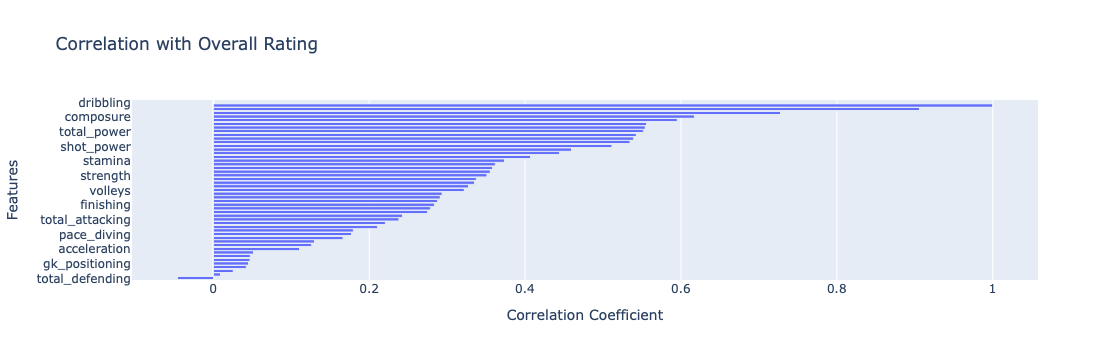

In [317]:
[ x for x in [df.columns][0] if 'p' in x ]

['potential',
 'best_position',
 'short_passing',
 'long_passing',
 'sprint_speed',
 'total_power',
 'shot_power',
 'jumping',
 'interceptions',
 'att._position',
 'penalties',
 'composure',
 'total_goalkeeping',
 'gk_positioning',
 'international_reputation',
 'pace_diving',
 'passing_kicking',
 'defending_pace',
 'player_name',
 'position',
 'no_of_playable_positions',
 'core_position']